In [43]:
import os
import pandas as pd # type: ignore
import numpy as np # type: ignore
import librosa # type: ignore
path_files = os.path.join(os.getcwd(), "lecturas", "Segon primària")
files = os.listdir(path_files)
names = np.array(list(map(lambda x: x.split(' ')[0], files)))



In [96]:
path_segon = os.path.join(os.getcwd(), "lecturas", "Segon primària")
path_tercer = os.path.join(os.getcwd(), "lecturas", "Tercer primària")
path_quart = os.path.join(os.getcwd(), "lecturas", "Quart primària")


files_segon = os.listdir(path_segon)
names_segon = np.array(list(map(lambda x: x.split(' ')[0], files_segon)))
dict_names_segon = {name: i+1  for i, name in enumerate(names_segon)}

files_tercer = os.listdir(path_tercer)
names_tercer = np.array(list(map(lambda x: x.split(' ')[0], files_tercer)))
dict_names_tercer = {name: i+1 for i, name in enumerate(names_tercer)}

files_quart = os.listdir(path_quart)
names_quart = np.array(list(map(lambda x: x.split(' ')[0], files_quart)))
dict_names_quart = {name: i+1 for i, name in enumerate(names_quart)}

paths_segon = [os.path.join(path_segon, f) for f in files_segon]
paths_tercer = [os.path.join(path_tercer, f) for f in files_tercer]
paths_quart = [os.path.join(path_quart, f) for f in files_quart]

C:\Users\joelq\AppData\Local\Temp\ipykernel_24764\40515137.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  speech_array, sampling_rate = librosa.load(file, sr=16000)
c:\Users\joelq\OneDrive\Escritorio\TFG\dl-dyslexia-detection\env\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


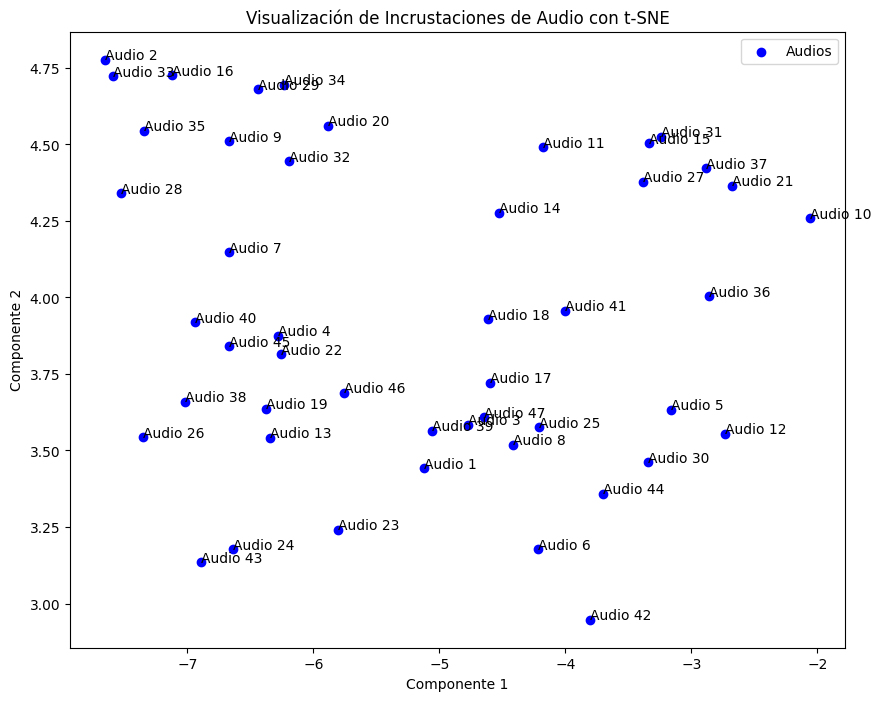

In [92]:
import torch
from transformers import WhisperProcessor, WhisperModel
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# 1. Cargar el procesador y el modelo de Whisper
processor = WhisperProcessor.from_pretrained("openai/whisper-base")
model = WhisperModel.from_pretrained("openai/whisper-base")

# Lista de archivos de audio
embeddings_list = []
 
# 2. Extraer las incrustaciones de cada archivo de audio
for file in paths_tercer:
    speech_array, sampling_rate = librosa.load(file, sr=16000)
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt")

    with torch.no_grad():
        encoder_outputs = model.encoder(inputs.input_features)
        embeddings = encoder_outputs.last_hidden_state

    # Tomar el promedio de las incrustaciones a lo largo del tiempo para simplificar (opcional)
    avg_embedding = embeddings.mean(dim=1).squeeze().numpy()
    embeddings_list.append(avg_embedding)

# Convertir la lista de incrustaciones a un array de numpy
embeddings_array = np.array(embeddings_list)

# 3. Reducir dimensionalidad con t-SNE o UMAP
# Usar t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)

# Alternativamente, usar UMAP
# reducer = umap.UMAP(n_components=2, random_state=42)
# embeddings_2d = reducer.fit_transform(embeddings_array)

# 4. Visualizar las incrustaciones en 2D
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', label='Audios')
for i, file in enumerate(paths_tercer):
    plt.annotate(f'Audio {i+1}', (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("Visualización de Incrustaciones de Audio con t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()


In [110]:
dict_names_segon['Julia']

25

In [ ]:
#segon sintomas dislexia
#33, 38, 39, 25

#tercer sintomas dislexia
#10, 12, 39, 44

In [9]:

def load_audio(filepath, sample_rate=16000):
    audio, sr = librosa.load(filepath, sr=sample_rate)
    # Recortar o hacer padding para que todos tengan la misma duración
    target_length = 60 * sr  # 1 minuto
    if len(audio) > target_length:
        audio = audio[:target_length]
    else:
        padding = target_length - len(audio)
        audio = np.pad(audio, (0, padding), 'constant')
    return audio, sr


In [ ]:
import matplotlib.pyplot as plt # type: ignore
import librosa.display # type: ignore

def plot_spectrogram(audio, sr):
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

plot_spectrogram(audio, sr)

In [12]:
def extract_features(audio, sr):
    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    # RMS
    rms = librosa.feature.rms(y=audio)
    return mfccs, chroma, rms

mfccs, chroma, rms = extract_features(audio, sr)

In [11]:
from sklearn.cluster import KMeans # type: ignore

def clustering_kmeans(features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(features)
    return clusters


In [2]:
import whisper

model = whisper.load_model("small")
# model = whisper.load_model("small")  # Puedes elegir "small", "medium", "large", etc.
import pickle

# Guarda el modelo
with open("whisper_small_model.pkl", "wb") as f:
    pickle.dump(model, f)


100%|███████████████████████████████████████| 461M/461M [00:37<00:00, 13.0MiB/s]


In [34]:
#to extract embeddings
import torch
from transformers import WhisperProcessor, WhisperModel
import librosa

# 1. Cargar el procesador y el modelo de Whisper
processor = WhisperProcessor.from_pretrained("openai/whisper-base")
model = WhisperModel.from_pretrained("openai/whisper-base")

# 2. Cargar un archivo de audio (reemplaza 'ruta/del/audio.wav' con tu archivo)
speech_array, sampling_rate = librosa.load("lecturas/Segon primària/Alba7 - Los okapis (Castellano) - LlM_ (Català).m4a", sr=16000)

# 3. Preprocesar el audio
inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt")

# 4. Obtener las incrustaciones (embeddings) del encoder del modelo
with torch.no_grad():
    encoder_outputs = model.encoder(inputs.input_features)

# 5. Extraer las incrustaciones
embeddings = encoder_outputs.last_hidden_state

# Imprimir la forma de las incrustaciones para ver su estructura
print(embeddings.shape)


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

C:\Users\joelq\AppData\Local\Temp\ipykernel_24764\764510330.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  speech_array, sampling_rate = librosa.load("lecturas/Segon primària/Alba7 - Los okapis (Castellano) - LlM_ (Català).m4a", sr=16000)
c:\Users\joelq\OneDrive\Escritorio\TFG\dl-dyslexia-detection\env\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


torch.Size([1, 1500, 512])


In [90]:
embeddings

tensor([[[-1.3796,  0.1729, -0.5129,  ..., -0.7578,  0.0074,  0.2289],
         [-0.4922,  0.0911,  0.2698,  ..., -0.1094,  0.1235,  0.3555],
         [-0.3370,  0.5743,  0.1251,  ..., -0.1153,  0.2616,  0.3294],
         ...,
         [ 0.0994,  0.8772,  0.4824,  ...,  0.4342,  0.3341,  0.4321],
         [-0.4736,  0.3491,  0.0144,  ...,  0.1666,  0.2359,  0.0337],
         [-1.0179,  1.0837,  0.0460,  ...,  0.2273, -0.5713, -0.4040]]])